<a href="https://colab.research.google.com/github/marikaitiprim/ConvexHull-ComputationalGeometry/blob/main/ComGeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONVEX HULL ALGORITHMS**

---




ΠΡΙΜΕΝΤΑ ΑΙΚΑΤΕΡΙΝΗ-ΜΑΡΙΑ\
sdi1900160

**Υλοποίηση 1: Κυρτό περίβλημα.**

1) Αυξητικός αλγόριθμος.

In [1]:
import numpy as np

def orientation(p1,p2,p3):
  if((p2[0]*p3[1])-(p2[1]*p3[0])-(p1[0]*p3[1])+(p1[1]*p3[0])+(p1[0]*p2[1])-(p1[1]*p2[0])) < 0:    #right orientation
    return True
  return False

def incremental(P):
  P.sort()                                                                                  #sort set by x
  Lup = [P[0],P[1]]                                                                         #initialize L upper
  for i in range(2,len(P)):
    Lup.append(P[i])
    while(len(Lup) > 2 and not orientation(Lup[len(Lup)-3],Lup[len(Lup)-2],Lup[len(Lup)-1])):   #lup has more than 2 elements and the 3 last points are not clockwise oriented
      Lup.pop(len(Lup)-2)                                                                     #remove 2nd from end point
  Llow  = [P[len(P)-1],P[len(P)-2]]                                                             #initialize L lower
  for i in range(len(P)-3,-1,-1):
    Llow.append(P[i])
    while(len(Llow) > 2 and not orientation(Llow[len(Llow)-3],Llow[len(Llow)-2],Llow[len(Llow)-1])):   #llow has more than 2 elements and the 3 last points are not clockwise oriented
      Llow.pop(len(Llow)-2)                                                                   #remove 2nd from end point
  Llow.pop(0)                                                                                   #remove first and last point from llow
  Llow.pop(len(Llow)-1)
  L = Lup + Llow
  return np.array(L)

Αλγόριθμος Περιτυλίγματος.

In [2]:
def collinear(p1,p2,p3):
  if((p3[1] - p2[1])*(p2[0] - p1[0]) == (p2[1] - p1[1])*(p3[0] - p2[0])):
    return True
  return False


def giftwrapping(S):
  S = sorted(S, key=lambda k: [k[0],k[1]])        #sort S with the smallest x
  r0 = S[0]                                       #initialize r0
  r = r0                                          #initialize current r
  P = []                                          #chain of points
  while True:
    P.append(r)                                   #current point in chain
    u = S[0]                                      #begin with r0 point as u
    for j in range(1,len(S)):
      t = S[j]                                      #point t in S
      if(orientation(r,u,t) or collinear(r,u,t)):   #check cw orientation and collinearity
        u = t
    if(u == r0):                                    #end point is the starting point
      break
    r = u
    S.remove(r)                                    #remove visisted point r
  return np.array(P)

Αλγόριθμος Διαίρει και Βασίλευε.

In [3]:
import math

def divideConquer(P):
  P.sort()                            #sort by x
  if(len(P) <= 2):                    #very few points
    return P
  alen = math.ceil(len(P)/2)
  blen = math.floor(len(P)/2)
  a = P[0:alen]                       #divide into 2 subsets
  b = P[alen:len(P)]
  ahull = divideConquer(a)            #find convex hull of the 2 subsets recursively
  bhull = divideConquer(b)
  return merge(ahull,bhull)           #merge convex hulls

def merge(ahull, bhull):
  rightmosta = max(ahull)             #find rightmost point of a
  leftmostb = min(bhull)              #find leftmost point of b
  uppera, upperb, lowera, lowerb = intersection(ahull, bhull, rightmosta, leftmostb)
  mergedch = []                       #merged polygon
  ai = uppera
  mergedch.append(ahull[uppera])      #begin with upper point of hull A
  while ai!=lowera:                   #append all the points between upper and lower point of A - counterclockwise orientation
    ai = (ai + 1)%len(ahull)          #attention to limits
    mergedch.append(ahull[ai])

  bj = lowerb
  mergedch.append(bhull[lowerb])      #connect the half of convex hull A with the lowest point of B
  while bj!=upperb:                   #append all the points between lower and upper point of B - counterclockwise orientation
    bj = (bj + 1)%len(bhull)          #attention to limits
    mergedch.append(bhull[bj])

  return mergedch



def intersection(ahull, bhull, rightmosta, leftmostb):
  ai = ahull.index(rightmosta)        #find Ai
  bj = bhull.index(leftmostb)         #find Bj

  ai1 = ai
  bj1 = bj
  flag = 1
  while flag:
    flag = 0
    ai2 = (ai1 + 1) % len(ahull)                    #Ai+1 - attention not getting out of limits
    while(orientation(ahull[ai1],ahull[ai2],bhull[bj1]) and not collinear(ahull[ai1],ahull[ai2],bhull[bj1])):     #clockwise Ai Ai+1 Bj - case for collinearity
      ai1 = (ai1 + 1) % len(ahull)              #increase i
      ai2 = (ai1 + 1) % len(ahull)
      flag = 1                                    #i changed

    bj2 = (bj1 - 1 + len(bhull))%len(bhull)        #Bj-1
    while(orientation(bhull[bj2],bhull[bj1],ahull[ai1]) and not collinear(bhull[bj2],bhull[bj1],ahull[ai1])):     #clockwise Bj-1 Bj Ai case for collinearity
      bj1 = (bj1 - 1 + len(bhull))%len(bhull)
      bj2 = (bj1 - 1 + len(bhull))%len(bhull)
      flag = 1                                    #j changed

  uppera = ai1                          #upper bridge AiBj
  upperb = bj1

  ai1 = ai
  bj1 = bj
  flag = 1
  while flag:
    flag = 0
    bj2 = (bj1 + 1) % len(bhull)                    #Bi+1 - attention not getting out of limits
    while(orientation(bhull[bj1],bhull[bj2],ahull[ai1]) and not collinear(bhull[bj1],bhull[bj2],ahull[ai1])):     #clockwise Bj Bj+1 Ai
      bj1 = (bj1 + 1) % len(bhull)              #increase j
      bj2 = (bj1 + 1) % len(bhull)
      flag = 1                                    #j changed

    ai2 = (ai1 - 1 + len(ahull))%len(ahull)        #Aj-1
    while(orientation(ahull[ai2],ahull[ai1],bhull[bj1]) and not collinear(ahull[ai2],ahull[ai1],bhull[bj1])):     #clockwise Ai-1 Ai Bj
      ai1 = (ai1 - 1 + len(ahull))%len(ahull)
      ai2 = (ai1 - 1 + len(ahull))%len(ahull)
      flag = 1                                    #i changed

  lowera = ai1                          #lower bridge AiBj
  lowerb = bj1

  return uppera, upperb, lowera, lowerb

Αλγόριθμος QuickHull.

In [4]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

def quickhull(P):
  return ConvexHull(P)

2) *Αυξητικός αλγόριθμος:* Πολυπλοκότητα Ο(nlogn) στη μέση και στη χειρότερη περίπτωση, όπου τα σημεία είναι ομοιόμορφα κατανεμημένα. Εκφυλισμένες περιπτώσεις όπου όλα τα σημεία αποτελούν κορυφές του κυρτού περιβλήματος (πχ. να βρίσκονται σε περιφέρεια κύκλου), δίνουν πολυπλοκότητα Ο(n^2). Άλλες τέτοιες περιπτώσεις είναι αυτές που τα n-1 σημεία βρίσκονται στην ακμή την οποία ορίζουν το αριστερότερο και το δεξιότερο σημείο, όπου η πολυπλοκότητα γίνεται γραμμιική O(n).\
*Αλγόριθμος περιτυλίγματος (Jarvis):* Πολυπλοκότητα Ο(nH), όπου H το πλήθος κορυφών στο κυρτό περίβλημα. Η συμπεριφορά του αλγορίθμου εξαρτάται από το πλήθος των κορυφών τους περιβλήματος. Ένα άνω φράγμα για την πολυπλοκότητα ως προς το μέγεθος της εισόδου είναι Ο(n^2), που αποτελεί και τη χειρότερη περίπτωση. Για μικρό πλήθος κορυφών γίνεται Ο(n).\
*Αλγόριθμος Διαίρει και Βασίλευε:* Πολυπλοκότητα Ο(nlogn).\
*Αλγόριθμος QuickHull:* Πολυπλοκότητα Ο(nlogn) εαν τα σημεία είναι κατανεμημένα τυχαία, αλλιώς Ο(n^2).






3) QuickHull σε 3 διαστάσεις.

In [6]:
def quickhull3d(P):
  return ConvexHull(P)

**Εφαρμογή 1:**

1) Ορίζουμε 80 τυχαία σημεία στο επίπεδο και θεωρούμε ότι παίρνουν πραγματικές τιμές από 0 μέχρι 200:

In [7]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(80)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[ 76.5869103  132.13678304]
 [ 53.94544818 109.13046188]
 [ 26.31086811 140.01014071]
 [ 51.13597436  32.95736309]
 [179.30915395 117.31190806]
 [114.29614963 115.97146731]
 [ 32.57829633  69.44004074]
 [147.81768976 130.54833256]
 [153.8540578    8.68387086]
 [ 40.9677544   60.68280221]
 [ 61.78318733  27.91259719]
 [ 80.49985351  20.14871993]
 [ 41.52308378 190.42045578]
 [ 86.31811016 197.91587404]
 [154.07406309  27.88946636]
 [195.90977709  41.36980884]
 [ 92.70225696 100.29693956]
 [ 24.06799274  13.23854776]
 [ 40.93476087 162.35641576]
 [148.75791763  65.28626552]
 [103.93210662 131.87269446]
 [ 70.55045219  62.57438868]
 [169.90542262 198.45428895]
 [ 31.02507916 142.11241474]
 [106.19959446  16.72779157]
 [179.06352982  83.30197379]
 [ 34.06590997 189.56995911]
 [ 72.03882838 177.21784359]
 [ 10.2271241    6.176794  ]
 [ 13.00966711  90.867104  ]
 [ 29.28204735 163.92868403]
 [174.36989933  77.91831163]
 [ 47.53840842 190.55234558]
 [ 29.97781017  53.90907707

α) Αυξητικός αλγόριθμος.

Points of convex hull:
[[ 10.2271241    6.176794  ]
 [ 13.00966711  90.867104  ]
 [ 16.77545183 174.85946481]
 [ 34.06590997 189.56995911]
 [ 86.31811016 197.91587404]
 [169.90542262 198.45428895]
 [185.8581149  190.75034818]
 [198.74251083 112.31823428]
 [195.90977709  41.36980884]
 [165.66703914   4.28777899]
 [ 66.43571787   0.91497941]]


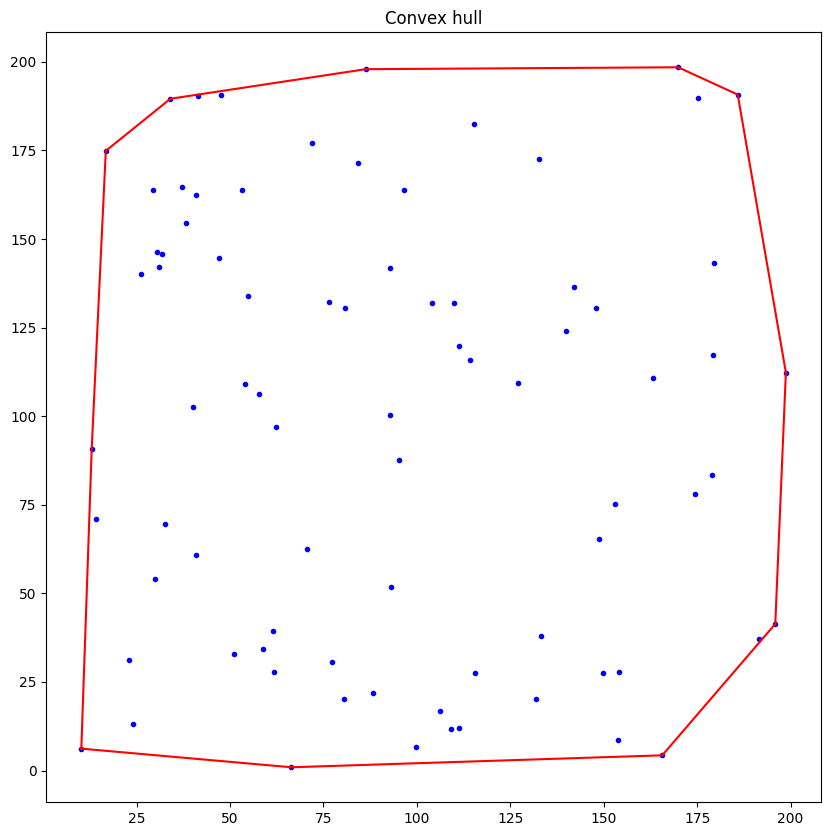

In [8]:
import matplotlib.pyplot as plt
import copy

def plot2D(Par,L):
  plt.figure(figsize=(10,10))
  x = Par[:,0]        #x coordinate for P
  y = Par[:,1]        #y coordinate for P
  plt.plot(x,y,'.b')  #plot all the points
  x = L[:,0]
  y = L[:,1]
  plt.plot(x,y,'r-')      #plot points of convex hull using coordinates x and y   
  xlast = [L[len(x)-1,0],L[0,0]]
  ylast = [L[len(x)-1,1],L[0,1]]
  plt.plot(xlast, ylast, 'r-')    #plot last vertex
  plt.title("Convex hull") 
  plt.show()


Pinc = copy.deepcopy(P)       #safe method to ensure that P will not change
Pincar = np.array(Pinc)
L = incremental(Pinc)
print("Points of convex hull:")
print(L)
plot2D(Pincar,L)

Αλγόριθμος περιτυλίγματος.

Points of convex hull:
[[ 10.2271241    6.176794  ]
 [ 66.43571787   0.91497941]
 [165.66703914   4.28777899]
 [195.90977709  41.36980884]
 [198.74251083 112.31823428]
 [185.8581149  190.75034818]
 [169.90542262 198.45428895]
 [ 86.31811016 197.91587404]
 [ 34.06590997 189.56995911]
 [ 16.77545183 174.85946481]
 [ 13.00966711  90.867104  ]]


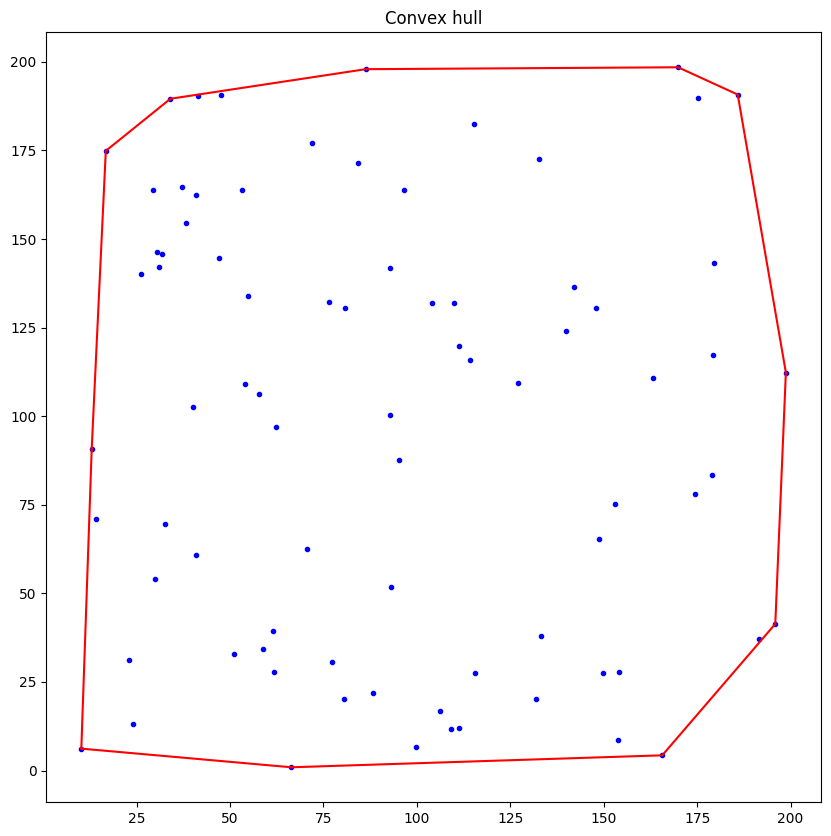

In [9]:
Pgw = copy.deepcopy(P)
Pgwar = np.array(Pgw)
L = giftwrapping(Pgw)
print("Points of convex hull:")
print(L)
plot2D(Pgwar,L)

Αλγόριθμος Διαίρει και Βασίλευε.

Points of convex hull:
[[ 86.31811016 197.91587404]
 [ 34.06590997 189.56995911]
 [ 16.77545183 174.85946481]
 [ 13.00966711  90.867104  ]
 [ 10.2271241    6.176794  ]
 [ 66.43571787   0.91497941]
 [165.66703914   4.28777899]
 [195.90977709  41.36980884]
 [198.74251083 112.31823428]
 [185.8581149  190.75034818]
 [169.90542262 198.45428895]]


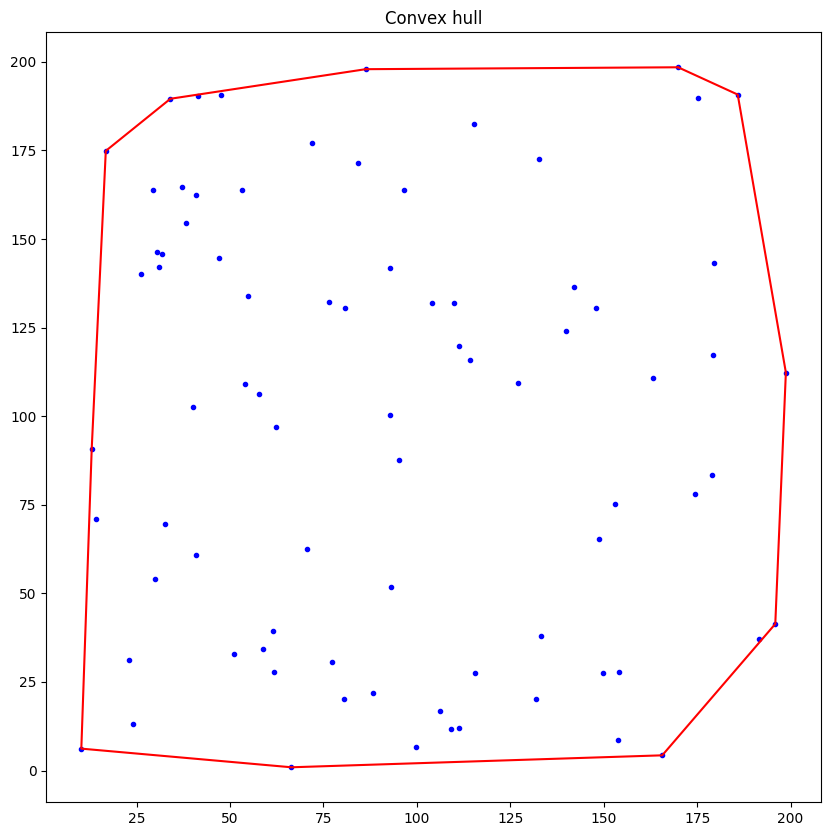

In [10]:
Pdc = copy.deepcopy(P)
Pdcar = np.array(Pdc)
L = divideConquer(Pdc)
print("Points of convex hull:")
print(np.array(L))
plot2D(Pdcar,np.array(L))

Αλγόριθμος Quickhull (2D).

Points of convex hull:
[[198.74251083 112.31823428]
 [185.8581149  190.75034818]
 [169.90542262 198.45428895]
 [ 86.31811016 197.91587404]
 [ 34.06590997 189.56995911]
 [ 16.77545183 174.85946481]
 [ 13.00966711  90.867104  ]
 [ 10.2271241    6.176794  ]
 [ 66.43571787   0.91497941]
 [165.66703914   4.28777899]
 [195.90977709  41.36980884]]


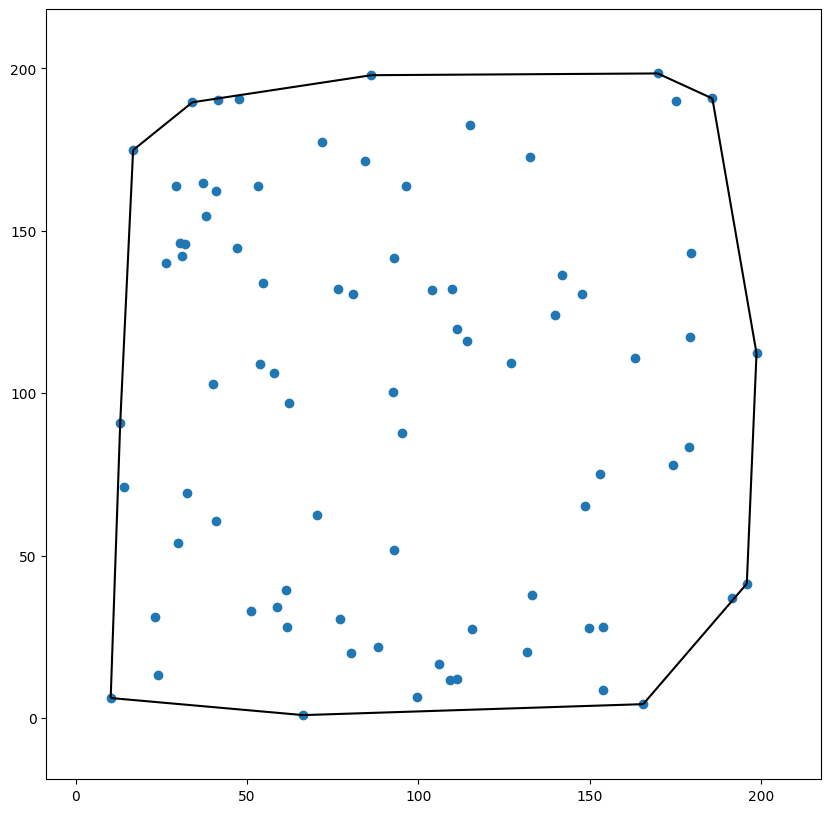

In [11]:
Pqh = copy.deepcopy(P)
Pqhar = np.array(Pqh)
L = quickhull(Pqh)
print("Points of convex hull:")
print(Pqhar[L.vertices])
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(L,ax)
plt.show()

β) Επιλέγουμε τον αυξητικό αλγόριθμο για την οπτικοποίηση των βημάτων του.

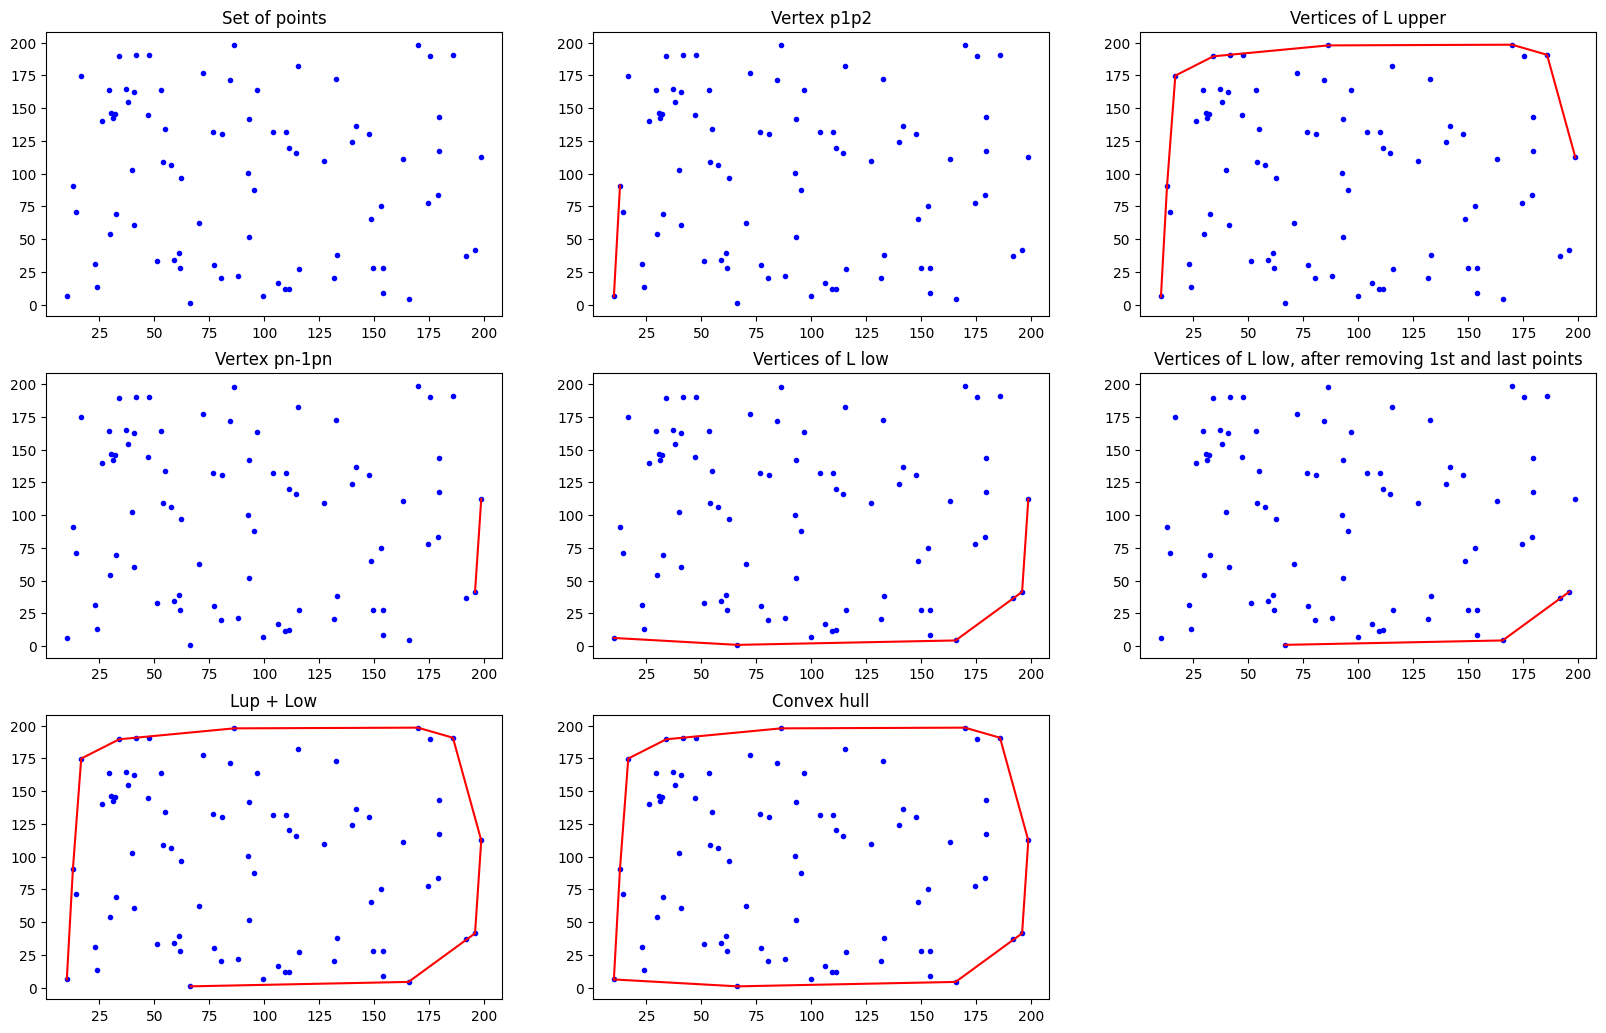

In [13]:
Pinc.sort()
fig = plt.figure(figsize=(20,17))
ax = fig.add_subplot(431)
Pincar = np.array(Pinc)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.title("Set of points")

ax = fig.add_subplot(432)                                                                              
Lup = [Pinc[0],Pinc[1]]  
Lupar = np.array((list(Pinc[0]),list(Pinc[1])))
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lupar[:,0],Lupar[:,1],'r-')        #plotting p1 and p2 
plt.title("Vertex p1p2")

for i in range(2,len(Pinc)):
  Lup.append(Pinc[i])
  while(len(Lup) > 2 and not orientation(Lup[len(Lup)-3],Lup[len(Lup)-2],Lup[len(Lup)-1])):   
    Lup.pop(len(Lup)-2)  

ax = fig.add_subplot(433)
j = 0
Lupar = [list(Lup[j]) for j in range(len(Lup))]
Lupar = np.array(Lupar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lupar[:,0],Lupar[:,1],'r-')        
plt.title("Vertices of L upper")
  

ax = fig.add_subplot(434)                                                                              
Llow  = [Pinc[len(Pinc)-1],Pinc[len(Pinc)-2]]
Llowar = np.array((list(Pinc[len(Pinc)-1]),list(Pinc[len(Pinc)-2])))
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')        #plotting pn and pn-1 
plt.title("Vertex pn-1pn")     
                                                                                                                 
for i in range(len(Pinc)-3,-1,-1):
  Llow.append(Pinc[i])
  while(len(Llow) > 2 and not orientation(Llow[len(Llow)-3],Llow[len(Llow)-2],Llow[len(Llow)-1])):   
    Llow.pop(len(Llow)-2)   

ax = fig.add_subplot(435)
j = 0
Llowar = [list(Llow[j]) for j in range(len(Llow))]
Llowar = np.array(Llowar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')       
plt.title("Vertices of L low")
                                                                
Llow.pop(0)                                                                                   
Llow.pop(len(Llow)-1)     

ax = fig.add_subplot(436)
j = 0
Llowar = [list(Llow[j]) for j in range(len(Llow))]
Llowar = np.array(Llowar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Llowar[:,0],Llowar[:,1],'r-')       
plt.title("Vertices of L low, after removing 1st and last points")

L = Lup + Llow

ax = fig.add_subplot(437)
j = 0
Lar = [list(L[j]) for j in range(len(L))]
Lar = np.array(Lar)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
plt.plot(Lar[:,0],Lar[:,1],'r-')       
plt.title("Lup + Low")


ax = fig.add_subplot(438)
plt.plot(Pincar[:,0],Pincar[:,1],'.b')
x = Lar[:,0]
y = Lar[:,1]
plt.plot(x,y,'r-')        
xlast = [Lar[len(x)-1,0],Lar[0,0]]
ylast = [Lar[len(x)-1,1],Lar[0,1]]
plt.plot(xlast, ylast, 'r-')    #plot last vertex
plt.title("Convex hull") 
plt.show()

2) Θα τρέξουμε τους παραπάνω αλγόριθμους για 500, για 1000, για 10.000 και για 100.000 σημεία και θα συγκρίνουμε τους χρόνους εκτέλεσής τους και τα αποτελέσματά τους.

500 σημεία:

In [14]:
import time

P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(500)]
Par1 = np.array(P)
print("List of points:")
print(Par1)

Pinc1 = copy.deepcopy(P)
Pgw1 = copy.deepcopy(P)
Pdc1 = copy.deepcopy(P)
Pqh1 = copy.deepcopy(P)

Pincar1 = np.array(Pinc1)
Pgwar1 = np.array(Pgw1)
Pdcar1 = np.array(Pdc1)
Pqhar1 = np.array(Pqh1)

tstart = time.time()
inc1 = incremental(Pinc1)
tend = time.time()
tinc1 = tend-tstart

tstart = time.time()
gw1 = giftwrapping(Pgw1)
tend = time.time()
tgw1 = tend-tstart

tstart = time.time()
dc1 = divideConquer(Pdc1)
tend = time.time()
tdc1 = tend-tstart

tstart = time.time()
qh1 = quickhull(Pqh1)
tend = time.time()
tqh1 = tend-tstart

List of points:
[[7.85789797e+01 1.93311188e+01]
 [4.33616931e+01 1.63905933e+02]
 [7.85899864e+01 1.75713262e+02]
 [9.61521036e+01 1.72661180e+01]
 [8.62862951e+01 7.73443272e+01]
 [1.15205351e+02 6.52891350e+00]
 [1.40136278e+02 1.82485735e+02]
 [6.80140819e+01 1.95402101e+02]
 [6.09440222e+01 5.00065832e+01]
 [1.23476280e+02 4.98323245e+00]
 [1.80818069e+01 1.43464569e+02]
 [1.78096776e+02 4.30820891e+01]
 [1.25187021e+02 1.37585237e+02]
 [1.04819829e+02 1.89989821e+02]
 [5.25916041e+01 4.35519022e+01]
 [1.99171376e+02 1.94904285e+02]
 [6.29744839e+01 6.70269591e+01]
 [1.36196308e+02 1.44230201e+02]
 [3.24983772e+01 1.40994229e+02]
 [1.68205588e+02 8.28060229e+01]
 [7.58846148e+01 1.72459299e+02]
 [4.96470323e+01 5.18048791e+01]
 [1.06424737e+02 1.81332298e+02]
 [9.42244032e+00 6.93352399e-01]
 [3.18220161e-02 1.07193776e+02]
 [1.00539151e+02 1.75884963e+02]
 [3.70994450e+01 1.68652963e+02]
 [1.14104640e+02 1.59481090e+02]
 [1.90707628e+02 3.14424704e+01]
 [1.04153188e+02 1.54002558

1000 σημεία:

In [15]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(1000)]
Par2 = np.array(P)
print("List of points:")
print(Par2)

Pinc2 = copy.deepcopy(P)
Pgw2 = copy.deepcopy(P)
Pdc2 = copy.deepcopy(P)
Pqh2 = copy.deepcopy(P)

Pincar2 = np.array(Pinc2)
Pgwar2 = np.array(Pgw2)
Pdcar2 = np.array(Pdc2)
Pqhar2 = np.array(Pqh2)

tstart = time.time()
inc2 = incremental(Pinc2)
tend = time.time()
tinc2 = tend-tstart

tstart = time.time()
gw2 = giftwrapping(Pgw2)
tend = time.time()
tgw2 = tend-tstart

tstart = time.time()
dc2 = divideConquer(Pdc2)
tend = time.time()
tdc2 = tend-tstart

tstart = time.time()
qh2 = quickhull(Pqh2)
tend = time.time()
tqh2 = tend-tstart

List of points:
[[182.30603856  82.64983363]
 [128.62752484  73.48943035]
 [  5.52787877  19.95571564]
 ...
 [ 25.12927174 147.2664978 ]
 [117.1272478   43.05881069]
 [ 65.68747827 171.31241584]]


10.000 σημεία:

In [16]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(10000)]
Par3 = np.array(P)
print("List of points:")
print(Par3)

Pinc3 = copy.deepcopy(P)
Pgw3 = copy.deepcopy(P)
Pdc3 = copy.deepcopy(P)
Pqh3 = copy.deepcopy(P)

Pincar3 = np.array(Pinc3)
Pgwar3 = np.array(Pgw3)
Pdcar3 = np.array(Pdc3)
Pqhar3 = np.array(Pqh3)

tstart = time.time()
inc3 = incremental(Pinc3)
tend = time.time()
tinc3 = tend-tstart

tstart = time.time()
gw3 = giftwrapping(Pgw3)
tend = time.time()
tgw3 = tend-tstart

tstart = time.time()
dc3 = divideConquer(Pdc3)
tend = time.time()
tdc3 = tend-tstart

tstart = time.time()
qh3 = quickhull(Pqh3)
tend = time.time()
tqh3 = tend-tstart

List of points:
[[153.0242398   45.61011393]
 [197.97604374 131.49338792]
 [ 55.10379057 128.45028698]
 ...
 [ 25.28121589  74.07828783]
 [ 56.08366635 133.39445514]
 [101.46720644 179.42147528]]


100.000 σημεία:

In [17]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(100000)]
Par4 = np.array(P)
print("List of points:")
print(Par4)

Pinc4 = copy.deepcopy(P)
Pgw4 = copy.deepcopy(P)
Pdc4 = copy.deepcopy(P)
Pqh4 = copy.deepcopy(P)

Pincar4 = np.array(Pinc4)
Pgwar4 = np.array(Pgw4)
Pdcar4 = np.array(Pdc4)
Pqhar4 = np.array(Pqh4)

tstart = time.time()
inc4 = incremental(Pinc4)
tend = time.time()
tinc4 = tend-tstart

tstart = time.time()
gw4 = giftwrapping(Pgw4)
tend = time.time()
tgw4 = tend-tstart

tstart = time.time()
dc4 = divideConquer(Pdc4)
tend = time.time()
tdc4 = tend-tstart

tstart = time.time()
qh4 = quickhull(Pqh4)
tend = time.time()
tqh4 = tend-tstart

List of points:
[[ 96.48800021  56.52181356]
 [ 53.14832978 134.76891787]
 [141.64061279  11.90383002]
 ...
 [125.51470537 115.77901727]
 [164.60525791  22.8544664 ]
 [172.65225509 177.09739358]]


Σύγκριση χρόνων σε δευτερόλεπτα:

In [19]:
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('Points/Time(sec)','Incremental','Giftwrapping','Divide and Conquer', 'Quickhull'))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('500 points',tinc1,tgw1,tdc1,tqh1))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('1000 points',tinc2,tgw2,tdc2,tqh2))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('10000 points',tinc3,tgw3,tdc3,tqh3))
print("{:<20} {:<25} {:<25} {:<25} {:<25}".format('100000 points',tinc4,tgw4,tdc4,tqh4))

Points/Time(sec)     Incremental               Giftwrapping              Divide and Conquer        Quickhull                
500 points           0.0019221305847167969     0.00706934928894043       0.003698587417602539      0.001367807388305664     
1000 points          0.007657289505004883      0.04109382629394531       0.014775753021240234      0.0020716190338134766    
10000 points         0.03917074203491211       0.34827351570129395       0.07594537734985352       0.0062978267669677734    
100000 points        0.5140118598937988        2.6474218368530273        0.8957474231719971        0.04736924171447754      


Παρατηρούμε ότι ο αλγόριθμος περιτυλίγματος αργεί να δώσει λύση σε σχέση με τους άλλους και αυτό φαίνεται ξεκάθαρα στα 100.000 σημεία. Ο πιο γρήγορος αλγόριθμος είναι ο Quickhull, ωστόσο και ο αυξητικός αλλά και ο Διαίρει και Βασίλευε δίνουν αποτελέσματα σε εύλογο χρόνο (κάτω από 1 δευτερόλεπτο).

Αποτελέσματα αλγορίθμων σε γραφικές παραστάσεις:

500 σημεία:

Points of incremental's convex hull
[[3.18220161e-02 1.07193776e+02]
 [7.26685768e-01 1.83520828e+02]
 [1.13517713e+01 1.94675176e+02]
 [9.53778573e+01 1.99635676e+02]
 [1.76702195e+02 1.99906189e+02]
 [1.99171376e+02 1.94904285e+02]
 [1.99411274e+02 1.43783533e+02]
 [1.98656905e+02 4.61587653e+01]
 [1.97817924e+02 2.31236962e+01]
 [1.94782296e+02 6.38689514e+00]
 [1.63476061e+02 8.46053299e-01]
 [9.42244032e+00 6.93352399e-01]
 [7.48508235e-01 8.29928199e+00]
 [3.58339967e-01 4.51031098e+01]]
Total number: 14
Points of giftwrapping convex hull
[[3.18220161e-02 1.07193776e+02]
 [3.58339967e-01 4.51031098e+01]
 [7.48508235e-01 8.29928199e+00]
 [9.42244032e+00 6.93352399e-01]
 [1.63476061e+02 8.46053299e-01]
 [1.94782296e+02 6.38689514e+00]
 [1.97817924e+02 2.31236962e+01]
 [1.98656905e+02 4.61587653e+01]
 [1.99411274e+02 1.43783533e+02]
 [1.99171376e+02 1.94904285e+02]
 [1.76702195e+02 1.99906189e+02]
 [9.53778573e+01 1.99635676e+02]
 [1.13517713e+01 1.94675176e+02]
 [7.26685768e-01 1.8

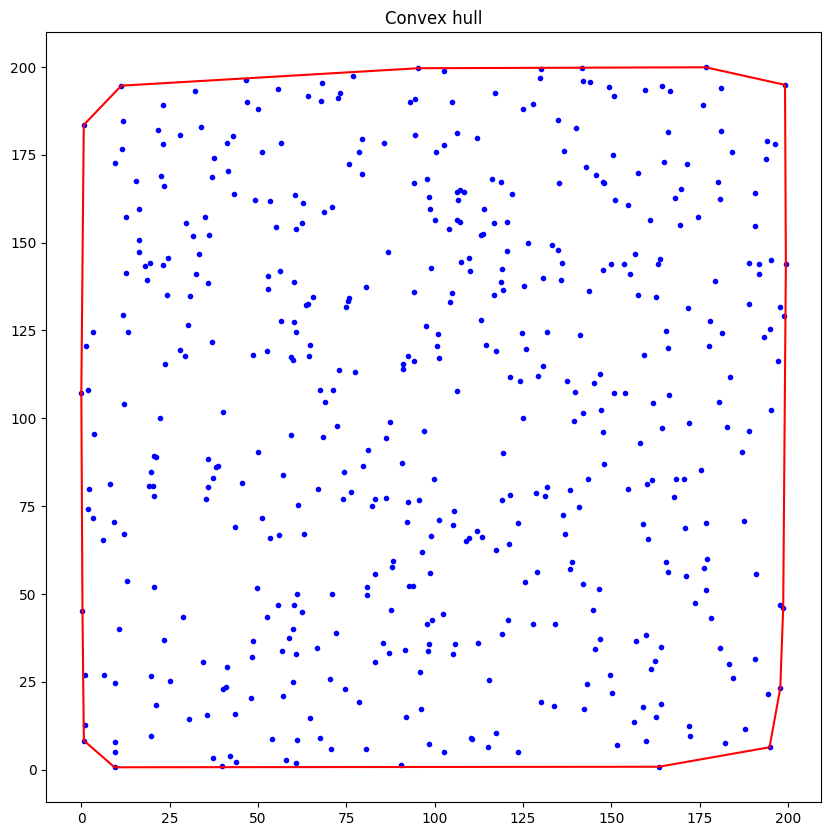

Giftwrapping:


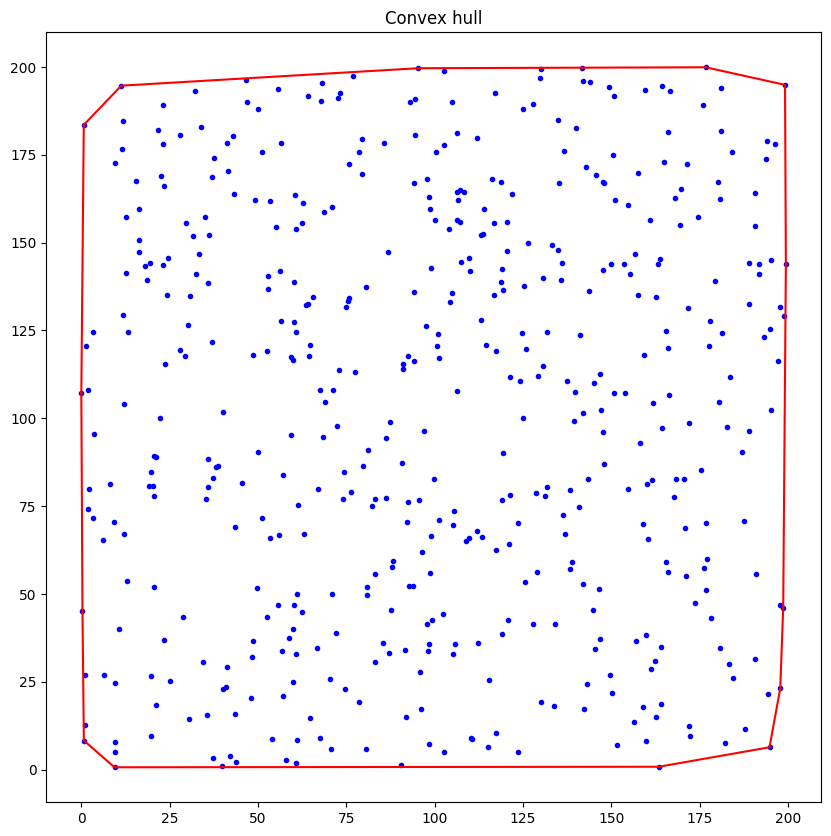

Divide and conquer:


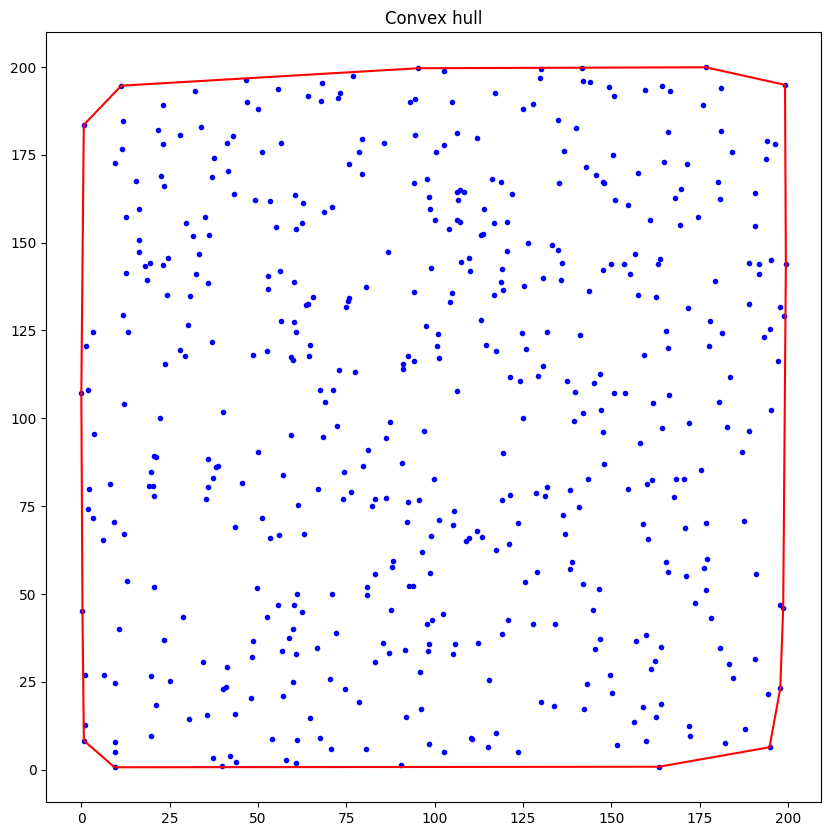

Quickhull:


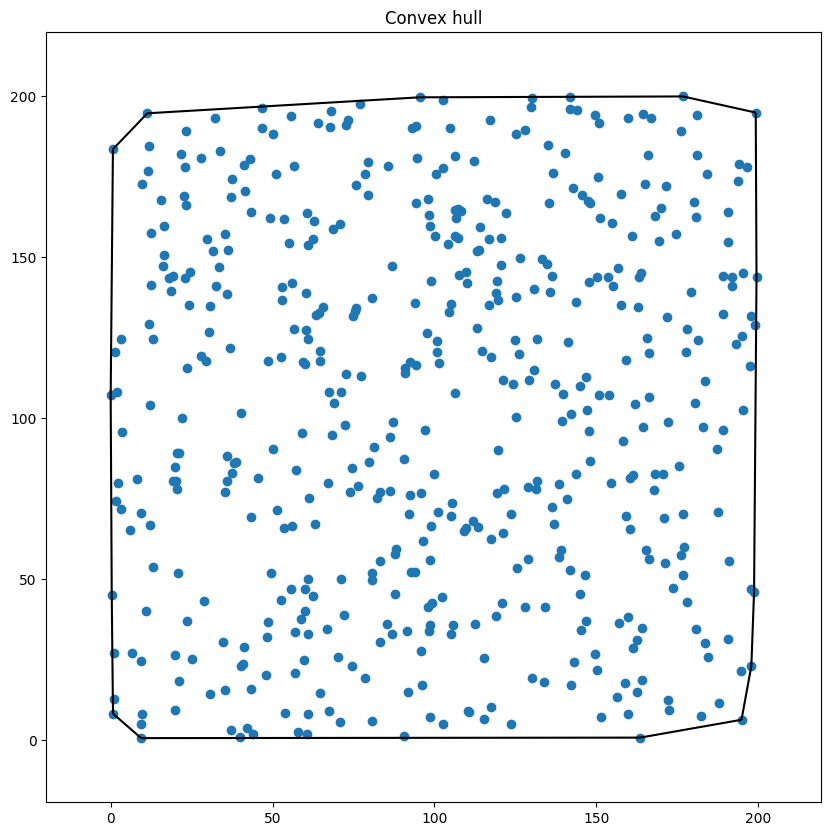

In [22]:
print('Points of incremental\'s convex hull')
print(inc1)
print('Total number:',len(inc1))
print('Points of giftwrapping convex hull')
print(gw1)
print('Total number:',len(gw1))
print('Points of divide and conquer convex hull')
print(np.array(dc1))        
print('Total number:',len(dc1))
print('Points of quickhull\'s convex hull')
print(Pqhar1[qh1.vertices])
print('Total number:',len(qh1.simplices))

print("Incremental:")
plot2D(Pincar1,inc1)
print("Giftwrapping:")
plot2D(Pgwar1,gw1)
print("Divide and conquer:")
plot2D(Pdcar1,np.array(dc1))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh1,ax)
plt.title("Convex hull")
plt.show()

1000 σημεία:

Points of incremental's convex hull
[[3.96199504e-02 1.59852156e+02]
 [1.95513661e-01 1.83145142e+02]
 [3.09404719e+00 1.95850905e+02]
 [1.28796168e+01 1.99998727e+02]
 [1.73146699e+02 1.99421561e+02]
 [1.82476801e+02 1.98520390e+02]
 [1.87351657e+02 1.97836415e+02]
 [1.96662693e+02 1.96362363e+02]
 [1.99810406e+02 1.65267586e+02]
 [1.99918542e+02 9.99610219e+01]
 [1.99598765e+02 4.23965909e+01]
 [1.98552899e+02 6.58809218e+00]
 [1.97505444e+02 4.79707006e+00]
 [1.91728775e+02 2.18430758e+00]
 [1.65419055e+02 1.17196571e+00]
 [1.12062780e+02 3.75099954e-01]
 [5.77799504e+01 9.95787768e-02]
 [4.89364962e+01 1.06393757e-01]
 [2.29372420e+01 1.53993853e+00]
 [2.66666888e+00 4.01574727e+00]
 [1.56546100e+00 1.93543753e+01]
 [1.32615309e-01 3.98143383e+01]
 [8.19242764e-02 4.46757035e+01]]
Total number: 23
Points of giftwrapping convex hull
[[3.96199504e-02 1.59852156e+02]
 [8.19242764e-02 4.46757035e+01]
 [1.32615309e-01 3.98143383e+01]
 [1.56546100e+00 1.93543753e+01]
 [2.66666888e+00 4.0

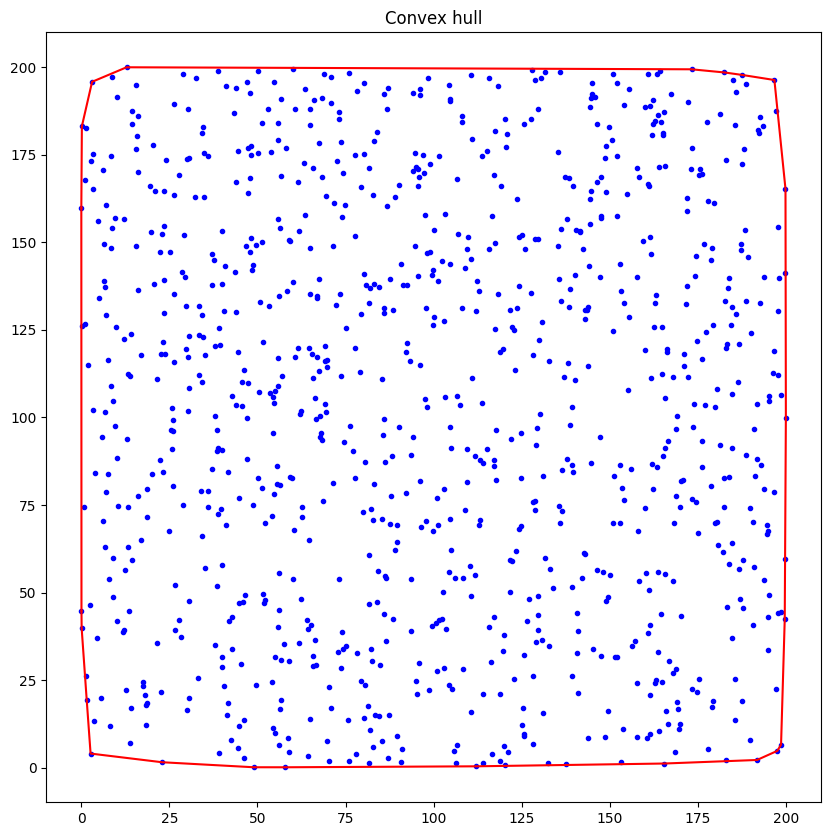

Giftwrapping:


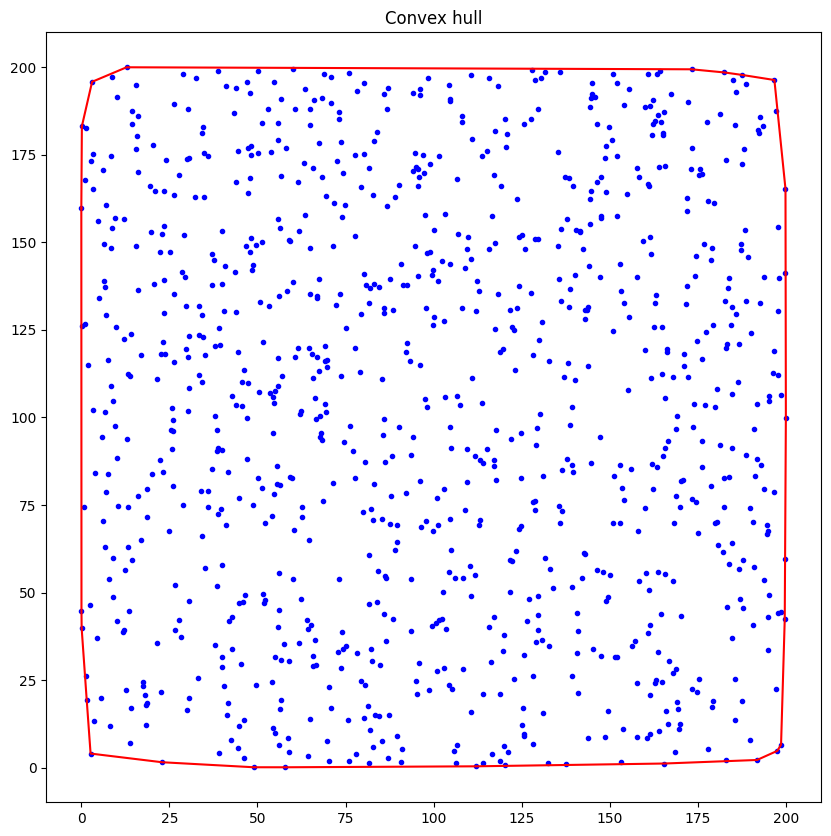

Divide and conquer:


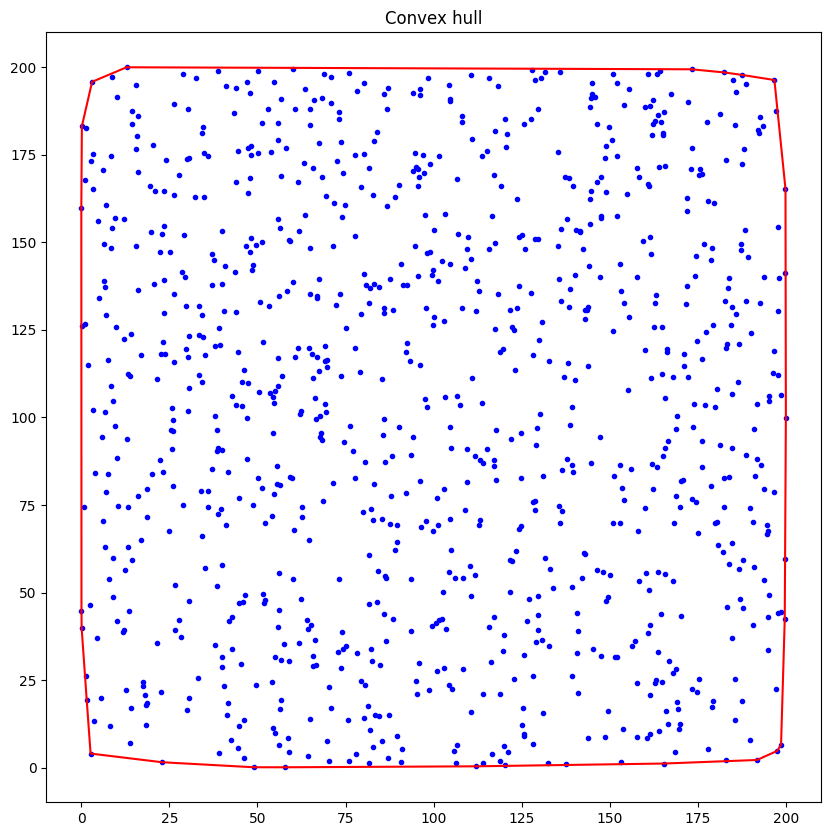

Quickhull:


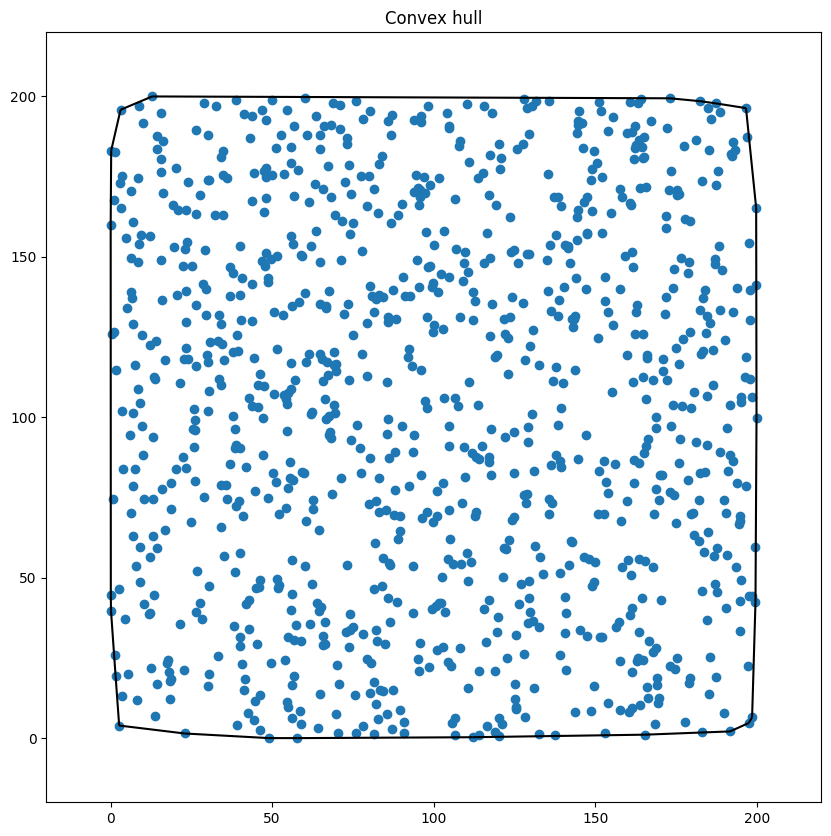

In [23]:
print('Points of incremental\'s convex hull')
print(inc2)
print('Total number:',len(inc2))
print('Points of giftwrapping convex hull')
print(gw2)
print('Total number:',len(gw2))
print('Points of divide and conquer convex hull')
print(np.array(dc2))        
print('Total number:',len(dc2))
print('Points of quickhull\'s convex hull')
print(Pqhar2[qh2.vertices])
print('Total number:',len(qh2.simplices))

print("Incremental:")
plot2D(Pincar2,inc2)
print("Giftwrapping:")
plot2D(Pgwar2,gw2)
print("Divide and conquer:")
plot2D(Pdcar2,np.array(dc2))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh2,ax)
plt.title("Convex hull")
plt.show()

10000 σημεία:

Points of incremental's convex hull
[[2.37743341e-03 1.36598432e+02]
 [5.71631367e-03 1.50215331e+02]
 [2.07313402e-02 1.72166544e+02]
 [2.59408111e-01 1.94634325e+02]
 [2.21662149e+00 1.99585953e+02]
 [9.40004759e+00 1.99920258e+02]
 [1.66481939e+02 1.99987546e+02]
 [1.97017310e+02 1.99800697e+02]
 [1.99874887e+02 1.98161232e+02]
 [1.99978769e+02 9.29416520e+01]
 [1.99982368e+02 7.58158399e+01]
 [1.99867700e+02 5.11134981e+00]
 [1.99156410e+02 1.46930445e-01]
 [1.66439687e+02 3.39391226e-02]
 [1.44221163e+02 6.35602536e-03]
 [2.95390437e+01 2.10889158e-02]
 [1.34447587e+01 5.28343796e-01]
 [5.57051051e+00 1.12243564e+00]
 [1.42524846e+00 1.75260152e+00]
 [5.25987952e-01 3.07507277e+00]
 [8.00030987e-02 3.06562526e+01]
 [1.07396717e-02 4.66087209e+01]]
Total number: 22
Points of giftwrapping convex hull
[[2.37743341e-03 1.36598432e+02]
 [1.07396717e-02 4.66087209e+01]
 [8.00030987e-02 3.06562526e+01]
 [5.25987952e-01 3.07507277e+00]
 [1.42524846e+00 1.75260152e+00]
 [5.57051051e+00 1.1

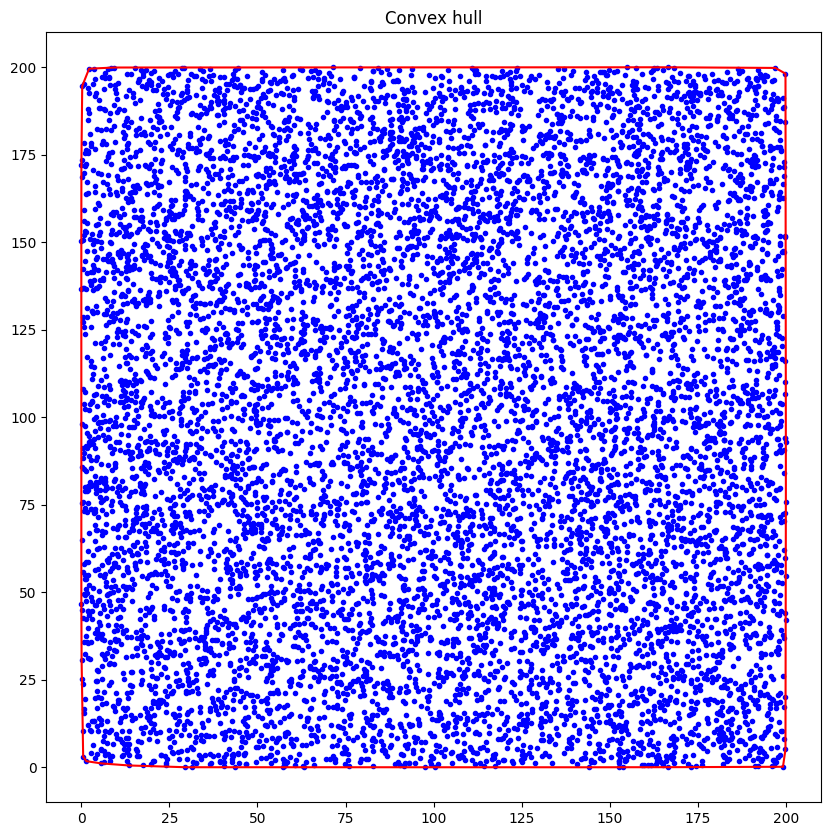

Giftwrapping:


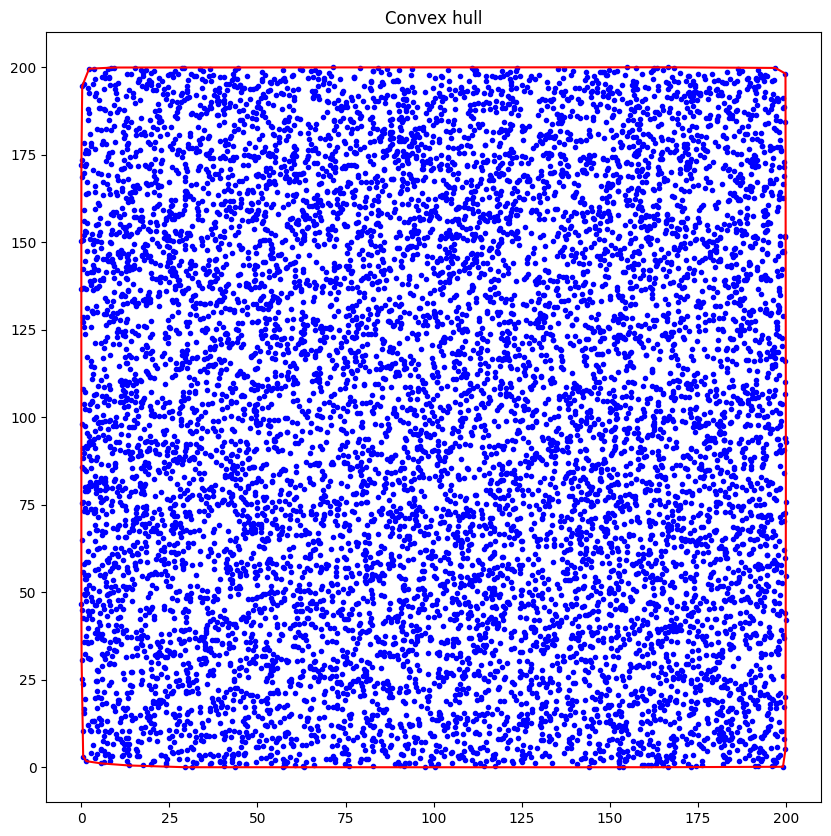

Divide and conquer:


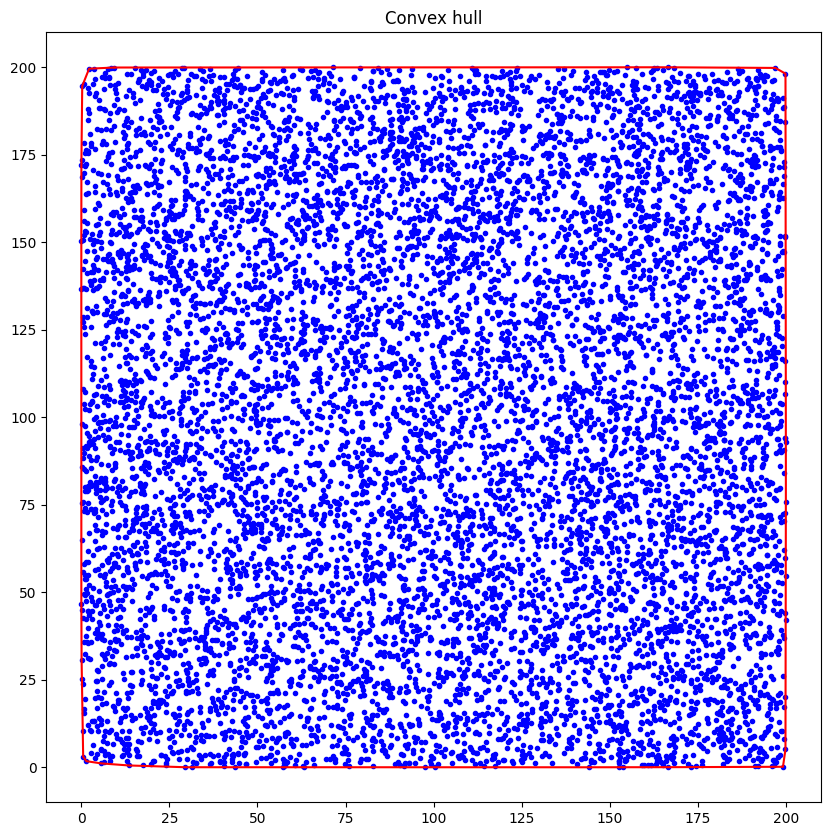

Quickhull:


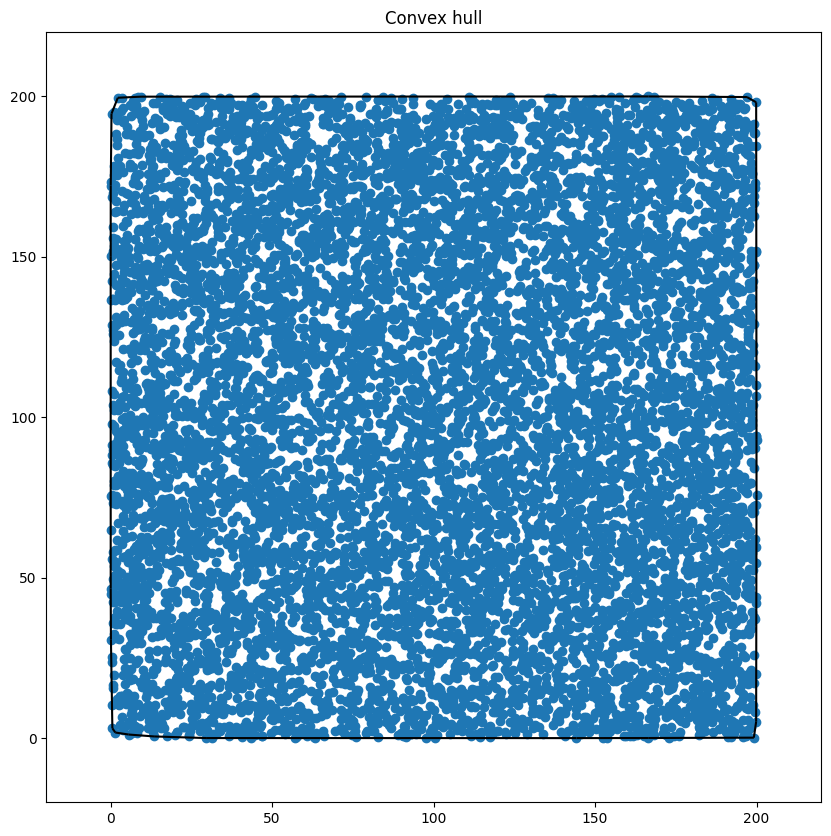

In [24]:
print('Points of incremental\'s convex hull')
print(inc3)
print('Total number:',len(inc3))
print('Points of giftwrapping convex hull')
print(gw3)
print('Total number:',len(gw3))
print('Points of divide and conquer convex hull')
print(np.array(dc3))        
print('Total number:',len(dc3))
print('Points of quickhull\'s convex hull')
print(Pqhar3[qh3.vertices])
print('Total number:',len(qh3.simplices))


print("Incremental:")
plot2D(Pincar3,inc3)
print("Giftwrapping:")
plot2D(Pgwar3,gw3)
print("Divide and conquer:")
plot2D(Pdcar3,np.array(dc3))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh3,ax)
plt.title("Convex hull")
plt.show()

100.000 σημεία:

Points of incremental's convex hull
[[3.92602917e-03 1.78759467e+02]
 [4.05395401e-02 1.98848777e+02]
 [7.62018804e-01 1.99955766e+02]
 [8.10373246e-01 1.99999858e+02]
 [1.99995329e+02 1.99999506e+02]
 [1.99999400e+02 1.77391485e+02]
 [1.99998967e+02 1.31141359e+02]
 [1.99995223e+02 1.32012012e+01]
 [1.99993594e+02 5.86881917e+00]
 [1.99991890e+02 2.72787116e+00]
 [1.99880083e+02 5.36162165e-01]
 [1.98563384e+02 2.11130368e-01]
 [1.95003014e+02 4.42481164e-03]
 [1.60622939e+02 6.33737608e-04]
 [2.97483416e+00 1.63697221e-02]
 [1.14884702e+00 4.34688034e-02]
 [1.15847021e-01 2.79196980e-01]
 [2.39633085e-02 6.20412002e-01]
 [6.35209587e-03 2.64657774e+01]]
Total number: 19
Points of giftwrapping convex hull
[[3.92602917e-03 1.78759467e+02]
 [6.35209587e-03 2.64657774e+01]
 [2.39633085e-02 6.20412002e-01]
 [1.15847021e-01 2.79196980e-01]
 [1.14884702e+00 4.34688034e-02]
 [2.97483416e+00 1.63697221e-02]
 [1.60622939e+02 6.33737608e-04]
 [1.95003014e+02 4.42481164e-03]
 [1.98563384e+02 2.1

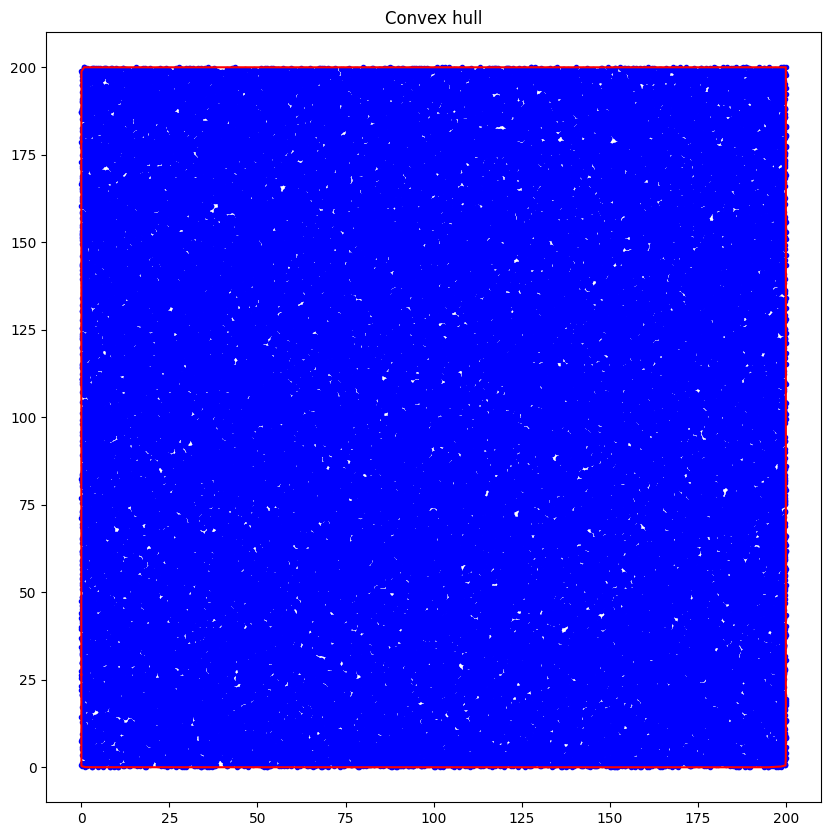

Giftwrapping:


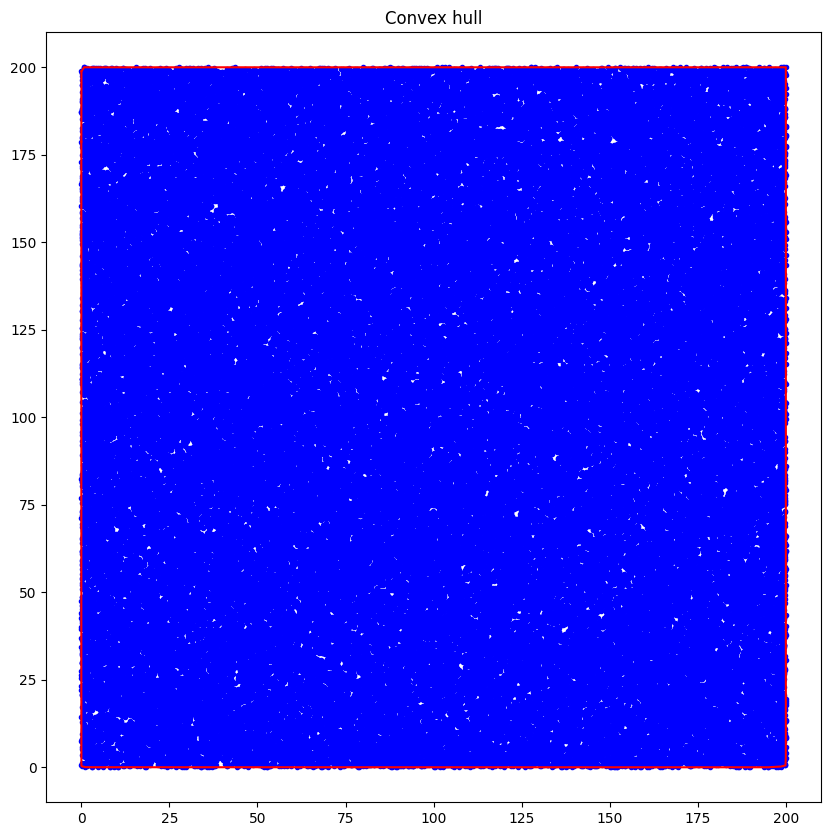

Divide and conquer:


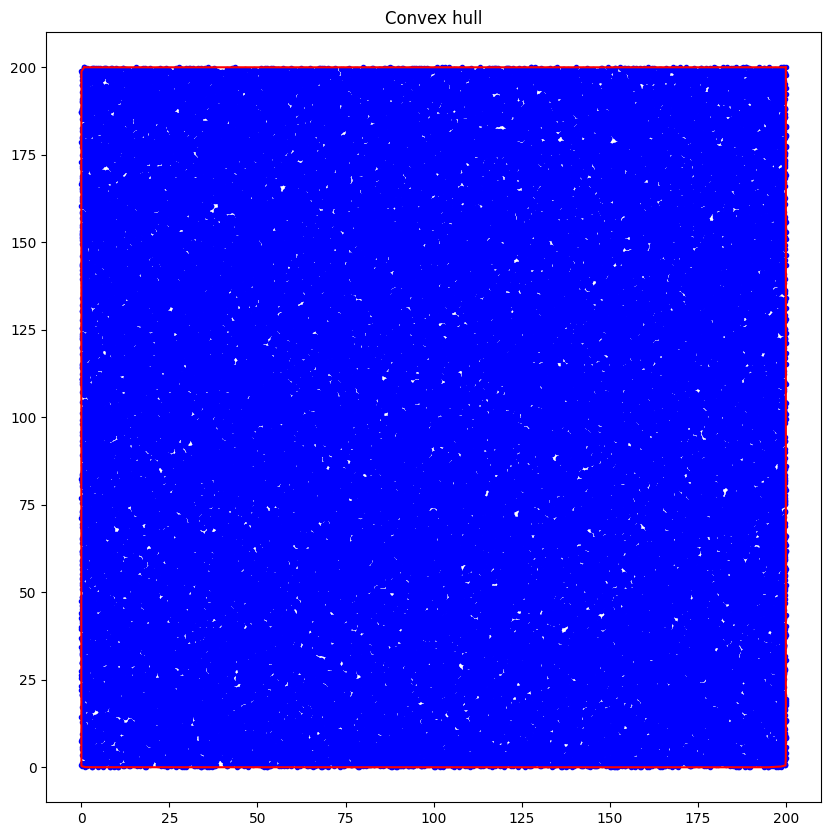

Quickhull:


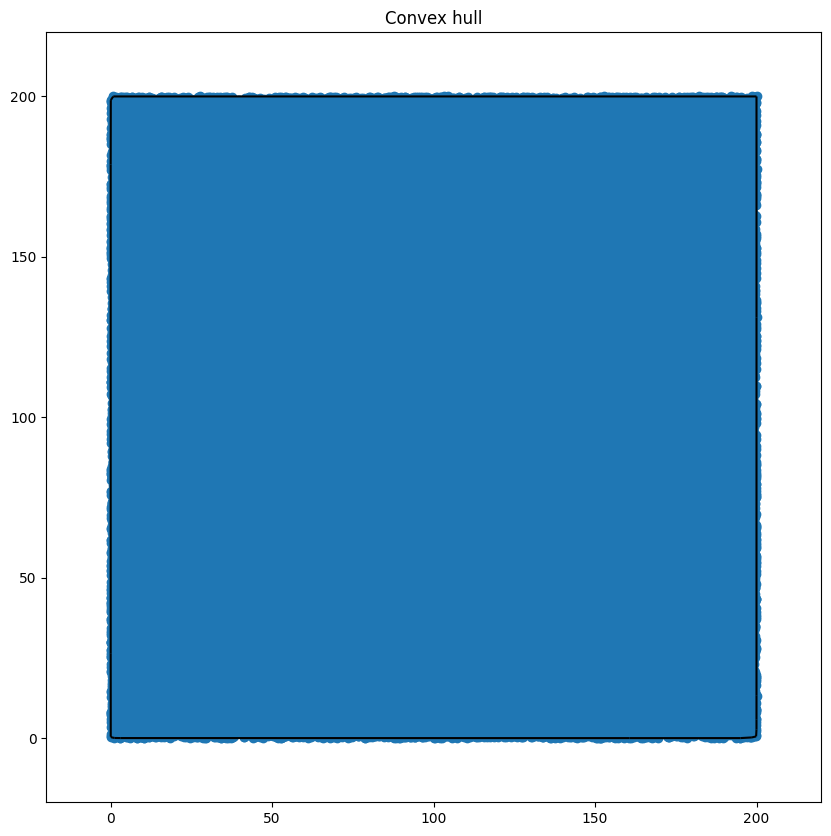

In [25]:
print('Points of incremental\'s convex hull')
print(inc4)
print('Total number:',len(inc4))
print('Points of giftwrapping convex hull')
print(gw4)
print('Total number:',len(gw4))
print('Points of divide and conquer convex hull')
print(np.array(dc4))        
print('Total number:',len(dc4))
print('Points of quickhull\'s convex hull')
print(Pqhar4[qh4.vertices])
print('Total number:',len(qh4.simplices))

print("Incremental:")
plot2D(Pincar4,inc4)
print("Giftwrapping:")
plot2D(Pgwar4,gw4)
print("Divide and conquer:")
plot2D(Pdcar4,np.array(dc4))
print("Quickhull:")
fig, ax = plt.subplots(figsize=(10,10))
_ = convex_hull_plot_2d(qh4,ax)
plt.title("Convex hull")
plt.show()

3) Θεωρούμε 50 τυχαία σημεία στις 3 διαστάσεις:

In [26]:
P = [(np.random.uniform(0,200),np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(50)]
Par = np.array(P)
print("List of points:")
print(Par)

List of points:
[[7.88984849e+01 1.88787449e+02 7.50315384e+00]
 [1.13286084e+02 1.46501160e+02 8.11143443e+01]
 [2.13221203e+01 1.07906329e+02 1.23710590e+02]
 [6.69618331e+00 4.77161106e+01 1.02257850e+02]
 [6.50440150e+01 1.11326337e+01 8.33263038e+00]
 [7.44367794e+01 1.02055107e+01 2.33890688e+01]
 [3.09368888e+01 2.73381282e+01 1.25484650e+02]
 [5.75423781e+01 6.04191700e+01 9.61127208e+01]
 [1.47326688e+02 1.33843636e+02 1.30532100e+02]
 [5.69911632e+01 1.57839198e+02 1.77549323e+02]
 [1.77001938e+02 5.02653829e+01 1.44658794e+02]
 [3.84296732e+01 2.45642501e-01 1.45611782e+02]
 [8.45141273e+01 1.15127645e+02 1.61205301e+02]
 [1.10385136e+02 1.32243376e+02 2.97178707e+01]
 [1.18812229e+02 2.33136209e+01 1.97513630e+02]
 [7.50090409e-01 8.07113579e+01 3.74092017e+01]
 [1.43168920e-01 1.46295559e+02 9.01560293e+01]
 [1.61933418e+02 7.37067458e+01 1.86738288e+02]
 [2.52100727e+01 3.95333451e+01 1.34416202e+02]
 [5.17897252e+01 1.66254613e+02 1.38721862e+02]
 [1.59098147e+02 7.44209

Αλγόριθμος Quickhull (3D).

Points of convex hull:
[[7.88984849e+01 1.88787449e+02 7.50315384e+00]
 [6.50440150e+01 1.11326337e+01 8.33263038e+00]
 [7.44367794e+01 1.02055107e+01 2.33890688e+01]
 [5.69911632e+01 1.57839198e+02 1.77549323e+02]
 [3.84296732e+01 2.45642501e-01 1.45611782e+02]
 [1.18812229e+02 2.33136209e+01 1.97513630e+02]
 [7.50090409e-01 8.07113579e+01 3.74092017e+01]
 [1.43168920e-01 1.46295559e+02 9.01560293e+01]
 [5.17897252e+01 1.66254613e+02 1.38721862e+02]
 [1.59098147e+02 7.44209881e+01 1.99958933e+02]
 [1.67372521e+02 1.65636863e+01 1.71962409e+02]
 [1.93296065e+02 3.45235430e+01 1.65608866e+02]
 [1.50938899e+02 1.74764348e+02 1.62321169e+02]
 [3.53762743e+01 1.18865625e+02 1.59916187e+01]
 [1.56360769e+02 1.47090419e+02 7.96394329e+00]
 [1.53601752e+02 7.95171220e+01 7.28355757e-01]
 [3.54279597e+00 4.45238834e+01 1.10538093e+02]
 [2.10760135e+01 1.14530218e+01 1.74024711e+01]
 [2.59857910e+01 1.36916456e+02 1.55565636e+02]
 [6.32588091e+01 2.48360378e+01 1.97733795e+00]
 [9.77767054e+01 

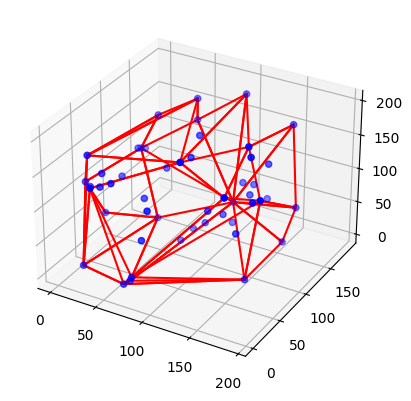

In [27]:
from matplotlib import axis
def plot3D(Par,L):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  x = Par[:,0]
  y = Par[:,1]
  z = Par[:,2]
  ax.scatter(x,y,z,c='b')   
  for s in L.simplices:
      simplices = np.append(s, s[0])
      x = Par[s, 0]
      y = Par[s, 1]
      z = Par[s, 2]
      ax.plot(x,y,z,'r-')

  plt.show()

L = quickhull3d(P)
print("Points of convex hull:")
print(Par[L.vertices])
plot3D(Par,L)